In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
%matplotlib inline  
import emcee
import math
import matplotlib
from pylab import *
import matplotlib.patheffects as PathEffects
hfont = {'fontname':'Times New roman'}

mpl.rcParams['legend.numpoints'] = 1





In [2]:
###### SiIV
xfit = np.array([pow(10.0, 12.5), pow(10.0, 17.75)])
x1fit = np.array([pow(10.0, 12.5), pow(10.0, 17.0)])
N0 =  pow(10.0, 13.64)



x1 = [pow(10.0, 12.6250),
     pow(10.0, 12.8750),
     pow(10.0, 13.1250),
     pow(10.0, 13.3750),
     pow(10.0, 13.8750)]

xbound_low1= [pow(10.0, 12.6250 -  0.125),
              pow(10.0, 12.8750 -  0.125),
              pow(10.0, 13.1250 - 0.125),
              pow(10.0, 13.3750 - 0.125),
              pow(10.0, 13.8750 - 0.125)]

xbound_high1= [pow(10.0,12.6250 +  0.125),
              pow(10.0, 12.8750 +  0.125),
              pow(10.0, 13.1250 + 0.125),
              pow(10.0, 13.3750 + 0.125),
              pow(10.0, 13.8750 + 0.125)]

y1 = np.array([7.5842944505e-14 ,
               4.05990161101e-14,
               8.82641160633e-15,
               4.76062106102e-15,
               1.46807785938e-15])

yerr1 = np.array([4.34306258632e-14,
                  2.38284750392e-14,
                  8.33164166627e-15,
                  4.58849541289e-15,
                  1.43289061952e-15])

alpha1 =-1.46  
alpha_error1 = 0.31
logB1 = -14.773188
logb_error1 = 0.25

fit_values1 = pow(10.0, logB1)*pow(x1fit/N0, alpha1)
fit_values_low1 = pow(10.0, logB1 - logb_error1)*pow(x1fit/N0, alpha1 -alpha_error1)
fit_values_high1 = pow(10.0, logB1 + logb_error1)*pow(x1fit/N0, alpha1 +alpha_error1)




In [3]:
nmid=np.array([12.5999994,13.0000000,13.3999996,13.7999992,14.1999998,
               14.5999994,15.0000000,15.3999996,15.7999992])
nlow  = nmid - 0.2
nhigh = nmid + 0.2

nmid = pow(10, nmid)
nlow = pow(10, nlow)
nhigh= pow(10, nhigh)


In [4]:
# si4 at 5.2
fn52 = np.array([1.267E-13, 2.102E-14, 9.207E-15, 3.999E-15, 4.643E-15, 
                 2.957E-15, 1.240E-15, 2.260E-16, 4.332E-17])
n52 = np.array([24.0, 10.0, 11.0, 12.0, 35.0, 56.0, 59.0, 27.0, 13.0])
fn52_err = np.log10(pow(n52, 0.5))
fn52_low = pow(10, np.log10(fn52) - fn52_err)
fn52_high = pow(10, np.log10(fn52) + fn52_err)


print(nmid[5], fn52_low[5], fn52[5], fn52_high[5])

3.98106620548e+14 3.95145746168e-16 2.957e-15 2.21281617854e-14


In [5]:
# si4 at 5.6
fn56 = np.array([7.218E-14, 2.874E-14, 1.220E-14, 6.680E-15, 2.780E-15, 
1.925E-15, 7.472E-16, 2.136E-16, 6.073E-17])

n56 = np.array([15.0, 15.0, 16.0, 22.0, 23.0, 40.0, 39.0, 28.0, 20.0])
fn56_err = pow(n56, 0.5)
fn56_err = np.log10(pow(n56, 0.5))
fn56_low = pow(10, np.log10(fn56) - fn56_err)
fn56_high = pow(10, np.log10(fn56) + fn56_err)


In [6]:
# si4 at 6.0
fn60 = np.array([5.731E-14, 1.580E-14, 4.891E-15, 5.007E-15, 2.436E-15, 
1.367E-15, 7.898E-16, 1.258E-16, 1.669E-17])
n60 = np.array([13.0,  9.0,  7.0, 18.0, 22.0, 31.0, 45.0, 18.0,  6.0])
fn60_err = pow(n60, 0.5)
fn60_err = np.log10(pow(n60, 0.5))
fn60_low = pow(10, np.log10(fn60) - fn60_err)
fn60_high = pow(10, np.log10(fn60) + fn60_err)
print(fn60_low, fn60, fn60_high)

[  1.58949341e-14   5.26666667e-15   1.84862424e-15   1.18016122e-15
   5.19356945e-16   2.45520448e-16   1.17736433e-16   2.96513444e-17
   6.81366397e-18] [  5.73100000e-14   1.58000000e-14   4.89100000e-15   5.00700000e-15
   2.43600000e-15   1.36700000e-15   7.89800000e-16   1.25800000e-16
   1.66900000e-17] [  2.06634144e-13   4.74000000e-14   1.29403697e-14   2.12429019e-14
   1.14258528e-14   7.61113388e-15   5.29813947e-15   5.33724198e-16
   4.08819838e-17]


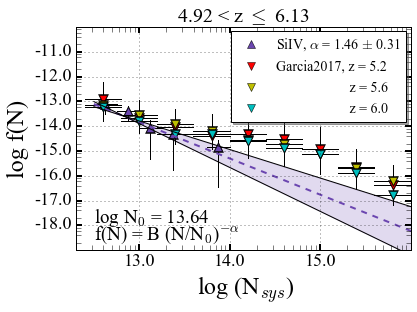

In [7]:
# x and y ranges and scale
plt.xlim([pow(10.0, 12.3),pow(10, 16.)])
plt.ylim([pow(10.0, -19.0), pow(10, -10.0)] )
plt.xscale('log')
plt.yscale('log')

# x and y ticks
xlabels = ['13.0', '14.0',  '15.0']
plt.xticks([pow(10.0, 13.0), pow(10.0, 14.0),
            pow(10.0, 15.0)], 
            xlabels, **hfont, fontsize = 18)
ylabels = ['-11.0', '-12.0', '-13.0', '-14.0', '-15.0', '-16.0', '-17.0', '-18.0']
plt.yticks([pow(10.0, -11.0),pow(10.0, -12.0),pow(10.0, -13.0), pow(10.0, -14.0), 
            pow(10.0, -15.0), pow(10.0, -16.0),
            pow(10.0, -17.0), pow(10.0, -18.0)], 
            ylabels, **hfont, fontsize = 18)

plt.grid(True)

# define the colors
fullzcolor = [240.0/256.0, 59.0/256.0, 32.0/256.0]
z1color = [107/256.0, 70/256.0, 177/256.0]
z2color = [252/256.0, 146/256.0, 114/256.0]


# plot the error_bars
for i in range(0, len(x1)):
    plt.plot([x1[i], x1[i]], [y1[i] - yerr1[i], y1[i] + yerr1[i]], 'k-', lw=1.0)
    plt.plot([xbound_low1[i], xbound_high1[i]], [y1[i], y1[i]], 'k-', lw=1.0)    


# plot the data
plt.plot(x1, y1, 'k^', markersize=10, alpha=1.0)  
plt.plot(x1, y1, '^', markersize=8, alpha=1.0, color = z1color,
         label="SiIV, $\\alpha$ = 1.46 $\pm$ 0.31")

# plot the error bars from Angela's sim
for i in range(0, len(nlow)):
    plt.plot([nlow[i], nhigh[i]], [fn52[i], fn52[i]], 'k-')
    plt.plot([nlow[i], nhigh[i]], [fn56[i], fn56[i]], 'k-')
    plt.plot([nlow[i], nhigh[i]], [fn60[i], fn60[i]], 'k-')

    plt.plot([nmid[i], nmid[i]], [fn52_low[i], fn52_high[i]], 'k-')
    plt.plot([nmid[i], nmid[i]], [fn56_low[i], fn56_high[i]], 'k-')
    plt.plot([nmid[i], nmid[i]], [fn60_low[i], fn60_high[i]], 'k-') 
    
    

plt.plot(nmid, fn52, 'kv', markersize=10, alpha=1.0)
plt.plot(nmid, fn52, 'rv', markersize=8, alpha=1.0,
         label="Garcia2017, z = 5.2")

plt.plot(nmid, fn56, 'kv', markersize=10, alpha=1.0)
plt.plot(nmid, fn56, 'yv', markersize=8, alpha=1.0,
         label="                     z = 5.6")

plt.plot(nmid, fn60, 'kv', markersize=10, alpha=1.0)
plt.plot(nmid, fn60, 'cv', markersize=8, alpha=1.0,
         label="                     z = 6.0")


# plot the best fit filled area
plt.plot(x1fit, fit_values1, '--', lw=2.0, color = z1color)
plt.plot(x1fit, fit_values_low1, 'k-', lw=1.0)
plt.plot(x1fit, fit_values_high1, 'k-', lw=1.0)
plt.fill_between(x1fit, fit_values_high1, fit_values_low1, color = z1color, alpha = 0.2)

# x, y labels and title
plt.xlabel(' log (N$_{sys}$)', **hfont,  fontsize=24)
plt.ylabel('log f(N)', **hfont,  fontsize=24)
plt.title("4.92 < z $\leq$ 6.13", **hfont,  fontsize=20)

# add legend
plt.rc('legend',**{'fontsize':14.})
plt.rc('font',family='Times New Roman')
plt.legend(bbox_to_anchor=(0.99, 0.99), loc=1, borderaxespad=0.1, shadow=True)

txt3 = plt.text(pow(10.0, 12.5), pow(10.0, -18.6), 
                "f(N) = B (N/N$_{0}$)$^{-\\alpha}$", 
                **hfont,  fontsize=19, color = 'k')

txt4 = plt.text(pow(10.0, 12.5), pow(10.0, -17.9), 
                "log N$_{0}$ = 13.64", 
                **hfont,  fontsize=19, color = 'k')

plt.tick_params(direction='in', length=6, width=2)
plt.tick_params(which='minor', length=5)



plot_path = '/Users/alex/Desktop/final_files/correct_precision/paper2/cddfs/plots/'
plot_name = plot_path + 'si4cddf.png'
plt.savefig(plot_name, bbox_inches='tight', figsize=[12,9], dpi=500)


In [8]:
nmid=np.array([12.5999994,13.0000000,13.3999996,13.7999992,14.1999998,
               14.5999994,15.0000000,15.3999996,15.7999992])
nlow  = nmid - 0.2
nhigh = nmid + 0.2

xfit = np.array([12.5, 17.75])
x1fit = np.array([12.5, 17.0])


x1 = [12.6250, 12.8750, 13.1250, 13.3750, 13.8750]
xbound_low1 = np.array([12.6250, 12.8750, 13.1250, 13.3750, 13.8750]) - 0.125
xbound_high1 = np.array([12.6250, 12.8750, 13.1250, 13.3750, 13.8750]) + 0.125

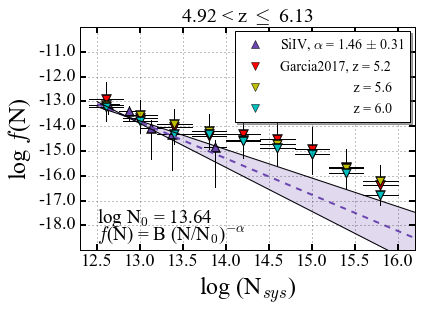

In [17]:
# x and y ranges and scale
plt.xlim([ 12.3, 16.2])
plt.ylim([pow(10.0, -19.0), pow(10, -10.0)] )
#plt.xscale('log')
plt.yscale('log')

# x and y ticks
xlabels = ['12.5', '13.0', '13.5', '14.0', '14.5', '15.0', '15.5', '16.0']
plt.xticks([12.5, 13.0, 13.5, 14.0, 14.5, 15.0, 15.5, 16.0], 
            xlabels, **hfont, fontsize = 18)
ylabels = ['-11.0', '-12.0', '-13.0', '-14.0', '-15.0', '-16.0', '-17.0', '-18.0']
plt.yticks([pow(10.0, -11.0),pow(10.0, -12.0),pow(10.0, -13.0), pow(10.0, -14.0), 
            pow(10.0, -15.0), pow(10.0, -16.0),
            pow(10.0, -17.0), pow(10.0, -18.0)], 
            ylabels, **hfont, fontsize = 18)

plt.grid(True)

# define the colors
fullzcolor = [240.0/256.0, 59.0/256.0, 32.0/256.0]
z1color = [107/256.0, 70/256.0, 177/256.0]
z2color = [252/256.0, 146/256.0, 114/256.0]


# plot the error_bars
for i in range(0, len(x1)):
    plt.plot([x1[i], x1[i]], [y1[i] - yerr1[i], y1[i] + yerr1[i]], 'k-', lw=1.0)
    plt.plot([xbound_low1[i], xbound_high1[i]], [y1[i], y1[i]], 'k-', lw=1.0)    


# plot the data
plt.plot(x1, y1, 'k^', markersize=10, alpha=1.0)  
plt.plot(x1, y1, '^', markersize=8, alpha=1.0, color = z1color,
         label="SiIV, $\\alpha$ = 1.46 $\pm$ 0.31")

# plot the error bars from Angela's sim
for i in range(0, len(nlow)):
    plt.plot([nlow[i], nhigh[i]], [fn52[i], fn52[i]], 'k-')
    plt.plot([nlow[i], nhigh[i]], [fn56[i], fn56[i]], 'k-')
    plt.plot([nlow[i], nhigh[i]], [fn60[i], fn60[i]], 'k-')

    plt.plot([nmid[i], nmid[i]], [fn52_low[i], fn52_high[i]], 'k-')
    plt.plot([nmid[i], nmid[i]], [fn56_low[i], fn56_high[i]], 'k-')
    plt.plot([nmid[i], nmid[i]], [fn60_low[i], fn60_high[i]], 'k-') 
    
    

plt.plot(nmid, fn52, 'kv', markersize=10, alpha=1.0)
plt.plot(nmid, fn52, 'rv', markersize=8, alpha=1.0,
         label="Garcia2017, z = 5.2")

plt.plot(nmid, fn56, 'kv', markersize=10, alpha=1.0)
plt.plot(nmid, fn56, 'yv', markersize=8, alpha=1.0,
         label="                     z = 5.6")

plt.plot(nmid, fn60, 'kv', markersize=10, alpha=1.0)
plt.plot(nmid, fn60, 'cv', markersize=8, alpha=1.0,
         label="                     z = 6.0")


# plot the best fit filled area
plt.plot(x1fit, fit_values1, '--', lw=2.0, color = z1color)
plt.plot(x1fit, fit_values_low1, 'k-', lw=1.0)
plt.plot(x1fit, fit_values_high1, 'k-', lw=1.0)
plt.fill_between(x1fit, fit_values_high1, fit_values_low1, color = z1color, alpha = 0.2)

# x, y labels and title
plt.xlabel('log (N$_{sys}$)', **hfont,  fontsize=24)
plt.ylabel('log $f$(N)', **hfont,  fontsize=24)
plt.title("4.92 < z $\leq$ 6.13", **hfont,  fontsize=20)

# add legend
plt.rc('legend',**{'fontsize':14.})
plt.rc('font',family='Times New Roman')
plt.legend(bbox_to_anchor=(0.99, 0.99), loc=1, borderaxespad=0.1, shadow=True)

txt3 = plt.text(12.5, pow(10.0, -18.6), 
                "$f$(N) = B (N/N$_{0}$)$^{-\\alpha}$", 
                **hfont,  fontsize=19, color = 'k')

txt4 = plt.text(12.5, pow(10.0, -17.9), 
                "log N$_{0}$ = 13.64", 
                **hfont,  fontsize=19, color = 'k')


plt.tick_params(direction='in', length=6, width=2)

plt.tick_params(which='minor', length=0)


plot_path = '/Users/alex/Desktop/final_files/correct_precision/paper2/cddfs/plots/'
plot_name = plot_path + 'si4cddf.png'
plt.savefig(plot_name, bbox_inches='tight', figsize=[12,9], dpi=500)

